In [207]:
import numpy as np
import matplotlib.pyplot as plt


In [208]:
def sigmoid(z):
    g = 1/(1+np.exp(-z))
    return g


In [209]:
z_tmp = np.linspace(-10,11)
y = sigmoid(z_tmp)


In [210]:
x_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

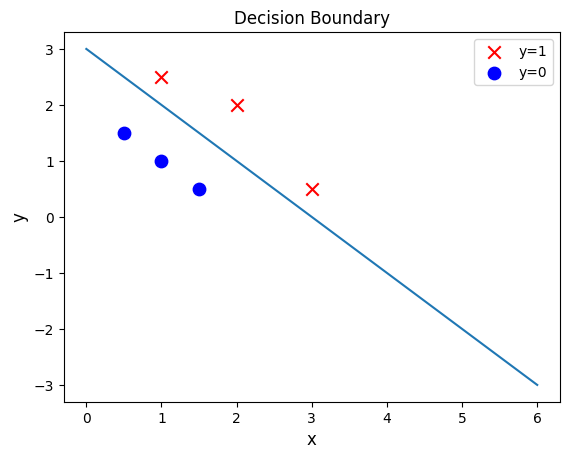

In [211]:
# Plotting the data
x0 = np.linspace(0,6)
x1 = 3 - x0
pos = y_train == 1
neg = y_train == 0
# plt.axes([0,4,4,4])
plt.scatter(x_train[pos,0],x_train[pos,1],marker='x',s=80,c='r',label='y=1')
plt.scatter(x_train[neg,0],x_train[neg,1],marker='o',s=80,c='b',label='y=0')
plt.ylabel('y',fontsize=12)
plt.xlabel('x',fontsize=12)
plt.title("Decision Boundary")
plt.legend();
plt.plot(x0,x1)
plt.show();

# Cost Function for Logistic Regression

In [212]:
import numpy as np
import matplotlib.pyplot as plt


In [213]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])  #(m,n)
y_train = np.array([0, 0, 0, 1, 1, 1])                                           #(m,)

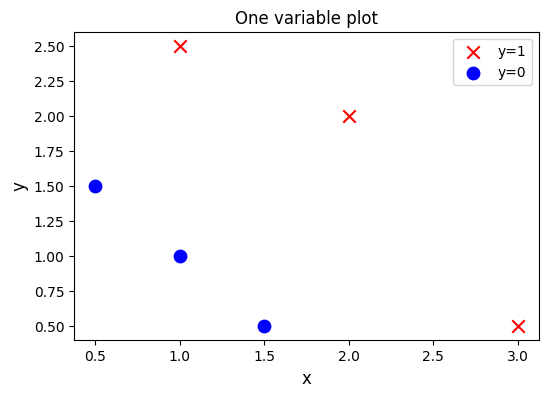

In [214]:
pos = y_train == 1
neg = y_train == 0
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.scatter(X_train[pos,0],X_train[pos,1],marker='x',s=80,c='r',label='y=1')
ax.scatter(X_train[neg,0],X_train[neg,1],marker='o',s=80,c='b',label='y=0')
ax.set_ylabel('y',fontsize=12)
ax.set_xlabel('x',fontsize=12)
ax.set_title("One variable plot")
ax.legend();


## Cost function

In a previous lab, you developed the *logistic loss* function. Recall, loss is defined to apply to one example. Here you combine the losses to form the **cost**, which includes all the examples.


Recall that for logistic regression, the cost function is of the form 

$$ J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \tag{1}$$

where
* $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point, which is:

    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
    
*  where m is the number of training examples in the data set and:
$$
\begin{align}
  f_{\mathbf{w},b}(\mathbf{x^{(i)}}) &= g(z^{(i)})\tag{3} \\
  z^{(i)} &= \mathbf{w} \cdot \mathbf{x}^{(i)}+ b\tag{4} \\
  g(z^{(i)}) &= \frac{1}{1+e^{-z^{(i)}}}\tag{5} 
\end{align}
$$
 

In [215]:
def compute_cost_logistic(X,y,w,b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i],w) + b
        f_wb_i = sigmoid(z_i)
        cost = cost + -y[i] * np.log(f_wb_i) - (1-y[i])  * np.log(1-f_wb_i)
    cost = cost/m
    return cost

In [216]:
w_tmp = np.array([1,1])
b_tmp = -3
print(compute_cost_logistic(X_train, y_train, w_tmp, b_tmp))

0.36686678640551745


## Example
Now, let's see what the cost function output is for a different value of $w$. 

* In a previous lab, you plotted the decision boundary for  $b = -3, w_0 = 1, w_1 = 1$. That is, you had `b = -3, w = np.array([1,1])`.

* Let's say you want to see if $b = -4, w_0 = 1, w_1 = 1$, or `b = -4, w = np.array([1,1])` provides a better model.

Let's first plot the decision boundary for these two different $b$ values to see which one fits the data better.

* For $b = -3, w_0 = 1, w_1 = 1$, we'll plot $-3 + x_0+x_1 = 0$ (shown in blue)
* For $b = -4, w_0 = 1, w_1 = 1$, we'll plot $-4 + x_0+x_1 = 0$ (shown in magenta)

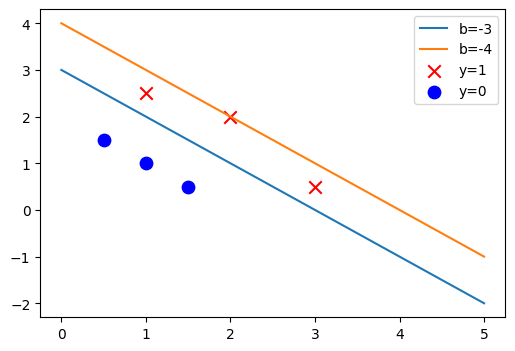

In [217]:
pos = y_train == 1
neg = y_train == 0 

x0 = np.arange(0,6)
x1 = 3 - x0
x1_other = 4 - x0

fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.plot(x0,x1,label='b=-3')
ax.plot(x0,x1_other,label='b=-4')
ax.scatter(X_train[pos,0],X_train[pos,1],marker='x',s=80,c='r',label='y=1')
ax.scatter(X_train[neg,0],X_train[neg,1],marker='o',s=80,c='b',label='y=0')

ax.legend()

You can see from this plot that `b = -4, w = np.array([1,1])` is a worse model for the training data. Let's see if the cost function implementation reflects this.

In [218]:
w1_array = np.array([1,1])
b1 = -3
w2_array = np.array([1,1])
b2 = -4
print(compute_cost_logistic(X_train,y_train,w1_array,b1))
print(compute_cost_logistic(X_train,y_train,w2_array,b2))

0.36686678640551745
0.5036808636748461
